# Pyber Ride Sharing
----

### Analysis
* Over 60% of all rides and total fare value come from urban riders.
* Rural riders tend to take significantly higher cost, albeit fewer, trips than urban or suburban riders.
* While comprising about 35% of all rides and fares, suburban and rural cities afford only 22% of Pyber's total driver population. There may be a strategic opportunity here to boost driver counts in these regions to enhance market share.

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### 4.4 Exploring the Data in Pandas

### Inspect City Data DataFrame

In [3]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [9]:
sum(city_data_df["type"]=="Suburban")

36

In [10]:
sum(city_data_df["type"]=="Rural")

18

In [11]:
urban_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
urban_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

### Inspect Ride Data DataFrame

In [12]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [13]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.loc[ride_data_df["city"]== "Lake Jonathanshire"].count()

city       24
date       24
fare       24
ride_id    24
dtype: int64

In [15]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge the DataFrames

In [17]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

## 5. Create a Bubble Plot For Ride Sharing Data

###  5.1 Create DataFrames For Each Type of City 

In [19]:
# Create DataFrames based on each type of city. 
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [20]:
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
urban_cities_df.count()

city            1625
date            1625
fare            1625
ride_id         1625
driver_count    1625
type            1625
dtype: int64

In [22]:
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [23]:
suburban_cities_df.count()

city            625
date            625
fare            625
ride_id         625
driver_count    625
type            625
dtype: int64

In [24]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [25]:
rural_cities_df.count()

city            125
date            125
fare            125
ride_id         125
driver_count    125
type            125
dtype: int64

### 5.2 Get the Number of Rides For Each City Type

In [26]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()

In [27]:
# Get the number of rides, the average fare and the number of drivers for the urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

In [28]:
urban_ride_count.loc[urban_ride_count.index == "Lake Jonathanshire"]

city
Lake Jonathanshire    24
Name: ride_id, dtype: int64

In [29]:
# Create the suburban and rural rider count Series. 
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [30]:
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

### 5.3 Get the Average Fare For Each City Type

In [31]:
urban_cities_df.groupby(["city"]).mean()

,fare,ride_id,driver_count
city,,,
Amandaburgh,24.641667,5.359336e+12,12.0
Barajasview,25.332273,4.676968e+12,26.0
Carriemouth,28.314444,5.184855e+12,52.0
Christopherfurt,24.501852,4.582307e+12,41.0
Deanville,25.842632,4.901508e+12,49.0
...,...,...,...
West Patrickchester,28.233125,5.302508e+12,25.0
West Robert,25.123871,4.575476e+12,39.0
West Samuelburgh,21.767600,4.566740e+12,73.0


In [32]:
# Get average fare for each urban city. 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [33]:
# Get average fare for each city for the suburban and rural cities. 
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df .groupby(["city"]).mean()["fare"]

### 5.4 Get the Number of Drivers For Each City Type

In [34]:
urban_cities_df.groupby(["city"]).mean()

,fare,ride_id,driver_count
city,,,
Amandaburgh,24.641667,5.359336e+12,12.0
Barajasview,25.332273,4.676968e+12,26.0
Carriemouth,28.314444,5.184855e+12,52.0
Christopherfurt,24.501852,4.582307e+12,41.0
Deanville,25.842632,4.901508e+12,49.0
...,...,...,...
West Patrickchester,28.233125,5.302508e+12,25.0
West Robert,25.123871,4.575476e+12,39.0
West Samuelburgh,21.767600,4.566740e+12,73.0


In [35]:
urban_cities_df["fare"].sum()

39854.380000000005

In [36]:
# Get the average number of drivers for each urban city. 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [37]:
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [38]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

### 5.5 Create Bubble Plots

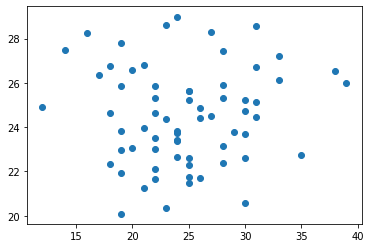

In [39]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

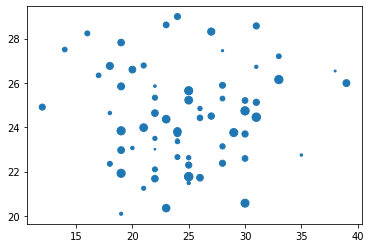

In [40]:
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=urban_driver_count)

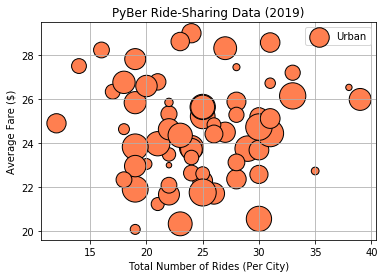

In [41]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, label="Urban")
# plt.ylim(15, 35)
# plt.xlim(5, 50)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend. 
plt.legend()

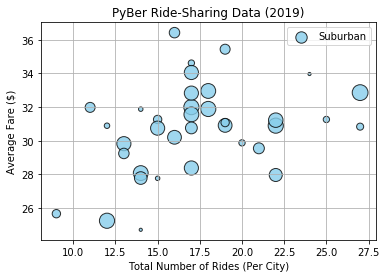

In [42]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

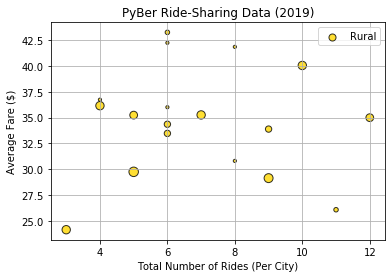

In [43]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### 5.5 Create a Bubble Chart For All Cities

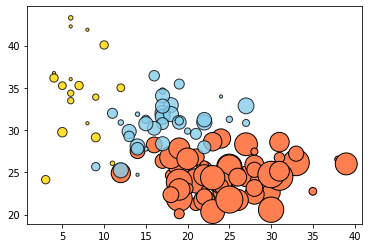

In [44]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")

# Show plot
plt.show()

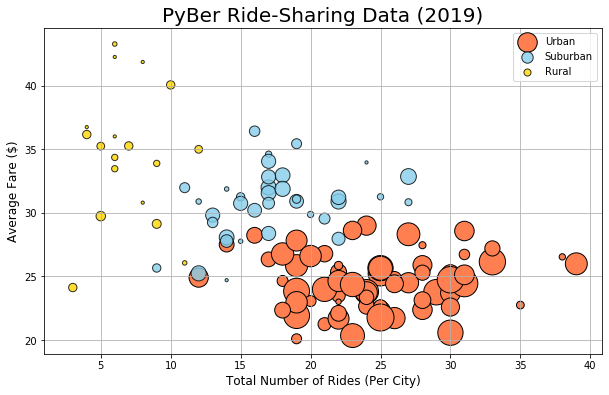

In [45]:
# Build the scatter plots for each city types
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Add the legend.
plt.legend()
# Show plot
plt.show()

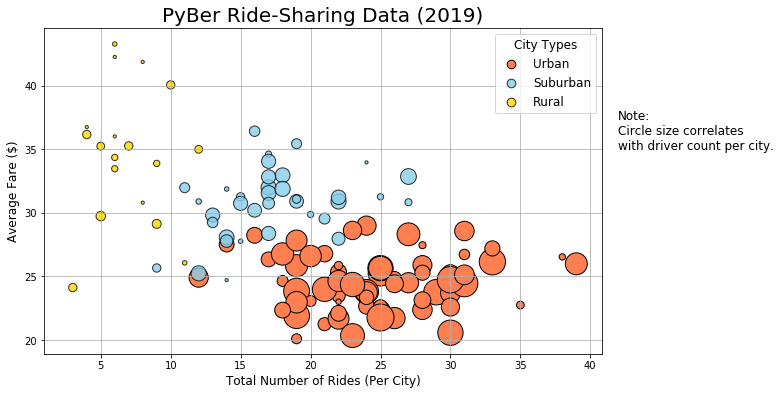

In [46]:
# Build the scatter plots for each city types
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",scatterpoints=1, 
                  loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.",fontsize=12)

# Save Figure
plt.savefig("analysis/Fig1.png")
# Show plot
plt.show()

### 6. Calculate Summary Statistics

### 6.1 Summary Statistics for the Number of Rides by City Type.
--- 
### Pandas describe() Function

In [47]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [48]:
suburban_cities_df.describe(),rural_cities_df.describe()

(             fare       ride_id  driver_count
 count  625.000000  6.250000e+02    625.000000
 mean    30.970128  4.971015e+12     13.712000
 std     10.677508  2.912410e+12      8.042372
 min     12.050000  3.218337e+08      1.000000
 25%     21.970000  2.364253e+12      5.000000
 50%     30.750000  5.053221e+12     16.000000
 75%     39.830000  7.551674e+12     21.000000
 max     49.960000  9.917744e+12     25.000000,
              fare       ride_id  driver_count
 count  125.000000  1.250000e+02    125.000000
 mean    34.623440  4.647746e+12      4.296000
 std     14.558046  2.887834e+12      2.691156
 min     10.110000  2.684873e+10      1.000000
 25%     19.900000  2.275364e+12      1.000000
 50%     37.050000  4.023962e+12      4.000000
 75%     47.070000  7.118047e+12      7.000000
 max     58.550000  9.990581e+12      9.000000)

In [49]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [50]:
# Get summary statistics.
suburban_ride_count.describe(),rural_ride_count.describe()

(count    36.000000
 mean     17.361111
 std       4.323707
 min       9.000000
 25%      14.000000
 50%      17.000000
 75%      19.250000
 max      27.000000
 Name: ride_id, dtype: float64,
 count    18.000000
 mean      6.944444
 std       2.508157
 min       3.000000
 25%       5.250000
 50%       6.000000
 75%       8.750000
 max      12.000000
 Name: ride_id, dtype: float64)

### Pandas mean(), median() and mode() methods 

In [51]:
# Calculate the mean of the ride count for each city type. 
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [52]:
# Calculate the median of the ride count for each city type. 
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [53]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [54]:
 suburban_ride_count.mode()

0    17
dtype: int64

In [55]:
 rural_ride_count.mode()

0    6
dtype: int64

### Numpy mean() and median() Functions and SciPy mode() Function 

In [56]:
# Import Numpy nd stats from SciPy
import numpy as np
import scipy.stats as sts

In [57]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [58]:
# Demonstrate calculating measures of central tendency for the fare for the urban cites
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride count for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride count for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride count for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride count for suburban trips is 17.36.
The median for the ride count for suburban trips is 17.0.
The mode for the ride count for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [59]:
# Demonstrate calculating measures of central tendency for the fare for the urban cites
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride count for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride count for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride count for rural trips is {mode_rural_ride_count}.")

The mean for the ride count for rural trips is 6.94.
The median for the ride count for rural trips is 6.0.
The mode for the ride count for rural trips is ModeResult(mode=array([6]), count=array([5])).


### 6.2 Summary Statistics for the Average Fare by City Type.

#### It is best not to use the"urban_avg_fare" to calcualte the mean, median, and mode because this calculates from the averages. 

### For the average fares for each city type, calculate the mean, median and mode with Numpy and SciPy stats.

In [60]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [61]:
round(urban_fares.mean(),2), urban_fares.median(), urban_fares.mode()

(24.53,
 24.64,
 0    22.86
 dtype: float64)

In [62]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [63]:
# Demonstrate calculating measures of central tendency for the fare for the urban cites
# mean_urban_avg_fare = np.mean(urban_avg_fare)
# print(f"The mean fare price for urban trips is {mean_urban_avg_fare:.2f}.")

# median_urban_avg_fare = np.median(urban_avg_fare)
# print(f"The median fare price for urban trips is {median_urban_avg_fare:.2f}.")

# mode_urban_avg_fare = sts.mode(urban_avg_fare)
# print(f"The mode fare price for urban trips is {mode_urban_avg_fare}.")

In [64]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [65]:
# Demonstrate calculating measures of central tendency for the fare for the urban cites
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_avg_fare)
print(f"The median fare price for suburban trips is {median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_avg_fare)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is 30.97.
The median fare price for suburban trips is 30.90.
The mode fare price for suburban trips is ModeResult(mode=array([24.70428571]), count=array([1])).


In [66]:
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [67]:
# Demonstrate calculating measures of central tendency for the fare for the urban cites
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is {mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is {median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is 34.62.
The median fare price for rural trips is 37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [68]:
# Demonstrate calculating measures of central tendency for the fare for the urban cites
mean_rural_avg_fare = np.mean(rural_avg_fare)
print(f"The mean fare price for rural trips is {mean_rural_avg_fare:.2f}.")

median_rural_avg_fare = np.median(rural_avg_fare)
print(f"The median fare price for rural trips is {median_rural_avg_fare:.2f}.")

mode_rural_avg_fare = sts.mode(rural_avg_fare)
print(f"The mode fare price for rural trips is {mode_rural_avg_fare}.")

The mean fare price for rural trips is 34.64.
The median fare price for rural trips is 35.12.
The mode fare price for rural trips is ModeResult(mode=array([24.12333333]), count=array([1])).


### 6.3 Summary Statistics for the Number of Drivers by City Type.

In [69]:
#  Get the driver count data from the urban cities. 
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

### For the number of drivers for each city type, calculate the mean, median and mode with Numpy and SciPy stats.

In [70]:
# Calculate the measures of central tendency for the number of drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for the number of drivers for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for the number of drivers for urban trips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the number of drivers for urban trips is {mode_urban_drivers}.")

The mean for the number of drivers for urban trips is 36.68.
The median for the number of drivers for urban trips is 37.00.
The mode for the number of drivers for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [71]:
#  Get the driver count data from the suburban cities. 
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [72]:
# Calculate the measures of central tendency for the number of drivers for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for the number of drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for the number of drivers for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the number of drivers for suburban trips is {mode_suburban_drivers}.")

The mean for the number of drivers for suburban trips is 13.71.
The median for the number of drivers for suburban trips is 16.00.
The mode for the number of drivers for suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [73]:
#  Get the driver count data from the rural cities. 
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [74]:
# Calculate the measures of central tendency for the number of drivers for the rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for the number of drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median for the number of drivers for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for the number of drivers for rural trips is {mode_rural_drivers}.")

The mean for the number of drivers for rural trips is 4.30.
The median for the number of drivers for rural trips is 4.00.
The mode for the number of drivers for rural trips is ModeResult(mode=array([1]), count=array([32])).


### 6.4 Create Box-and-Whisker Plots

### Box-and-whisker plots for ride count data.

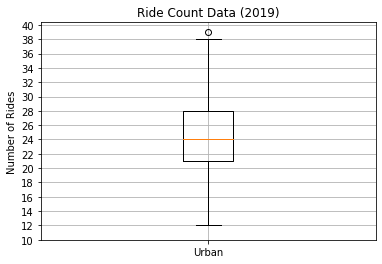

In [75]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

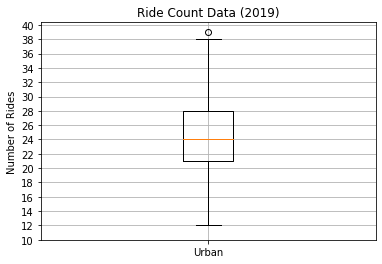

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [76]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()
# Add the summary statistics.
urban_ride_count.describe()

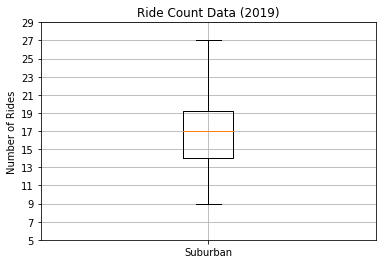

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [77]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 31, step=2.0))
ax.grid()
plt.show()
# Add the summary statistics.
suburban_ride_count.describe()

In [78]:
urban_ride_count.median

<bound method Series.median of city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64>

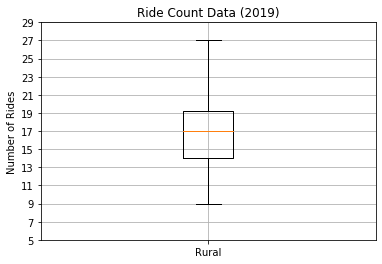

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [79]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 30, step=2.0))
ax.grid()
plt.show()
# Add the summary statistics.
rural_ride_count.describe()

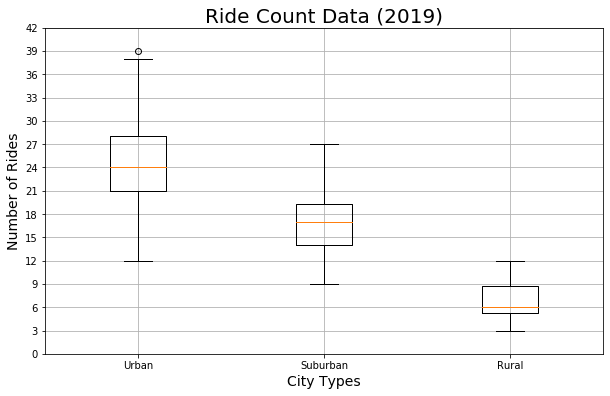

In [80]:
# Add all ride count box plots to the same graph. 
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save Figure
plt.savefig("analysis/Fig2.png")
plt.show()

### Determine the urban city that has the highest rider count. 

In [81]:
# Get the 100% quantile, which is the upper outlier. 
urban_ride_count==39

city
Amandaburgh            False
Barajasview            False
Carriemouth            False
Christopherfurt        False
Deanville              False
                       ...  
West Patrickchester    False
West Robert            False
West Samuelburgh       False
Williamsstad           False
Williamsview           False
Name: ride_id, Length: 66, dtype: bool

In [82]:
# Get the city that matches 39. 
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


### Box-and-whisker plots for the fare data. 

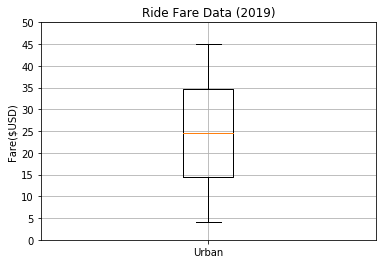

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [83]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

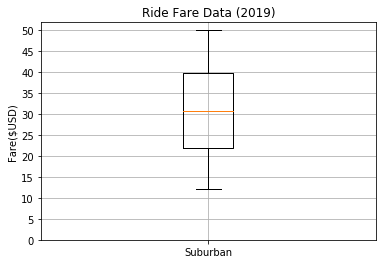

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [84]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

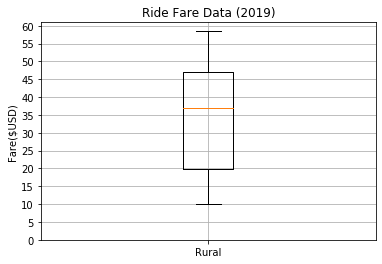

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [85]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,61, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

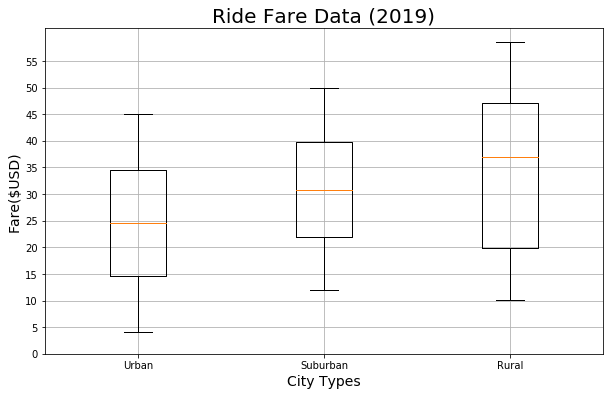

In [86]:
# Add all fare data box-and-whisker plots to the same graph. 
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()
# Save Figure
plt.savefig("analysis/Fig3.png")
plt.show()

### Box-and-Whisker Plots for Driver Count Data.

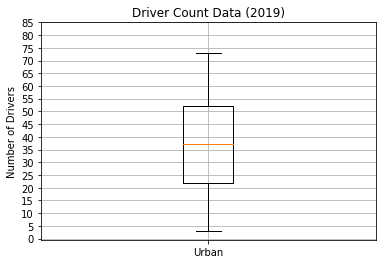

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [87]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

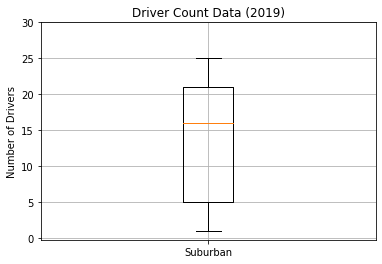

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [88]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 31, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

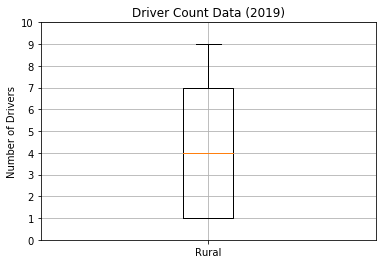

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [89]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 11, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

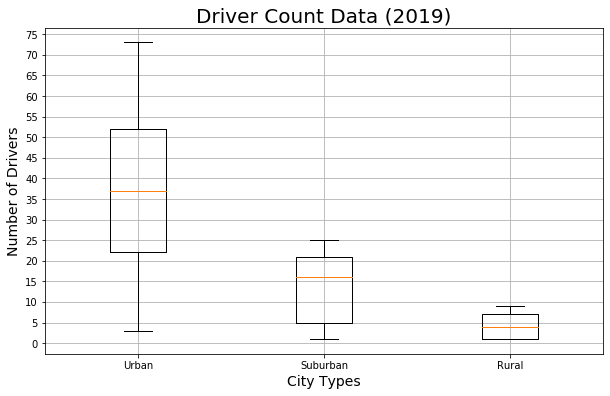

In [90]:
# Add all fare data box-and-whisker plots to the same graph. 
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
# Save Figure
plt.savefig("analysis/Fig4.png")
plt.show()

## 7. Percentage of Total Fares by City Type

### 7.1 Get the Percentage of Fares For Each City Type

In [91]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [92]:
# Get the sum of all the fares. 
total_fares =  pyber_data_df["fare"].sum()
total_fares

63538.64

In [93]:
type_percents = 100 * sum_fares_by_type / total_fares

In [94]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### 7.2 Create Pie Chart for Percentage of Fares by Each City Type

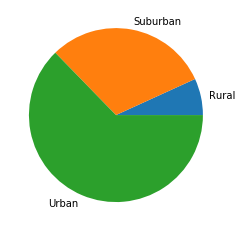

In [95]:
# Build Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"])
plt.show()

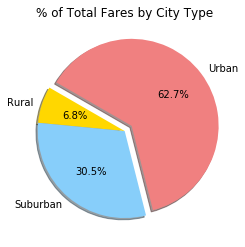

In [96]:
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

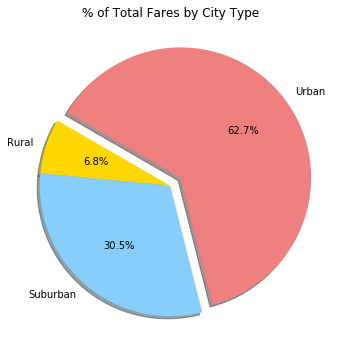

In [97]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size form 10 to 14.
mpl.rcParams['font.size'] = 14 
#  plt.rcParams['font.size'] = 14 can be used too. 
# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()

## 8. Percentage of Total Rides by City Type

### 8.1 Calculate Ride Percentages

In [98]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

### 8.2 Pie Chart for the Percentage of Rides for Each City Type

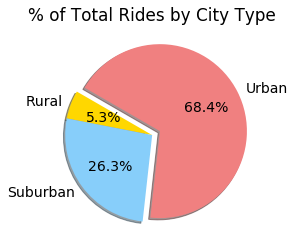

In [99]:
# Build percentage of rides by city type pie chart.
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Show Figure
plt.show()

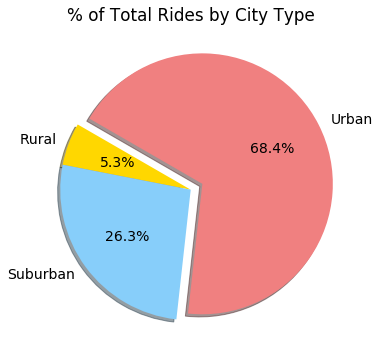

In [100]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size form 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

## 9. Percentage of Total Drivers by City Type

### 9.1 Calculate Driver Percentages

In [101]:
# Calculate the percentage of drivers for each city type
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

### 9.2 Pie Chart for the Percentage of Drivers for Each City Type

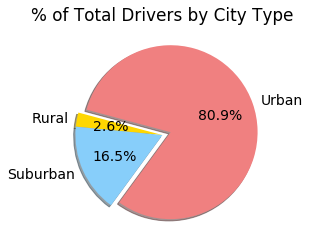

In [102]:
# Build percentage of drivers by city type pie chart.
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Show Figure
plt.show()

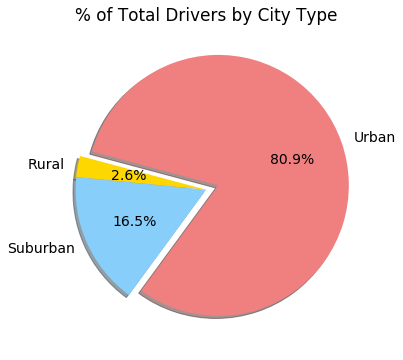

In [103]:
# Build percentage of drivers by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()